In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import funcoes_old as f

import yfinance as yf
from pandas_datareader import data as pdr

warnings.filterwarnings("ignore")
yf.pdr_override() 
plt.style.use("fivethirtyeight")

# yesterday = datetime.now() - timedelta(1)
yesterday = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
today = datetime.strftime(datetime.now(), '%Y-%m-%d')
datetime.strftime(datetime.now(), '%Y-%m-%d %A %H:%M:%S')

'2022-10-26 Wednesday 10:24:47'

In [3]:
df = f.acceleratingDualMomentum(interval='1MO', momentum='weighted') ## weighted / simple / og
benchmark = f.get60_40()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
bm_stats = f.stats(benchmark[['Cumulative Returns']])
bm_stats.append(len(benchmark['ret'].loc[benchmark['ret']>0]) / len(benchmark['ret'])*100)
BMStats  = pd.DataFrame(bm_stats,columns=['60/40'],
                                  index=['CAGR','STD','Sharpe','maxDD','Sortino','Positive Periods(%)'])
stats_port = f.stats(df[['Cumulative Returns']])
stats_port.append(len(df['ret'].loc[df['ret']>0]) / len(df['ret'])*100)
StratStats  = pd.DataFrame(stats_port,columns=['Dual Momentum'],
                                  index=['CAGR','STD','Sharpe','maxDD','Sortino','Positive Periods(%)'])
StratStats.join(BMStats)

,Dual Momentum,60/40
CAGR,12.651475,5.063181
STD,0.077946,0.090345
Sharpe,1.489259,0.444944
maxDD,-12.018006,-34.136961
Sortino,2.278828,0.500632
Positive Periods(%),76.300578,64.804469


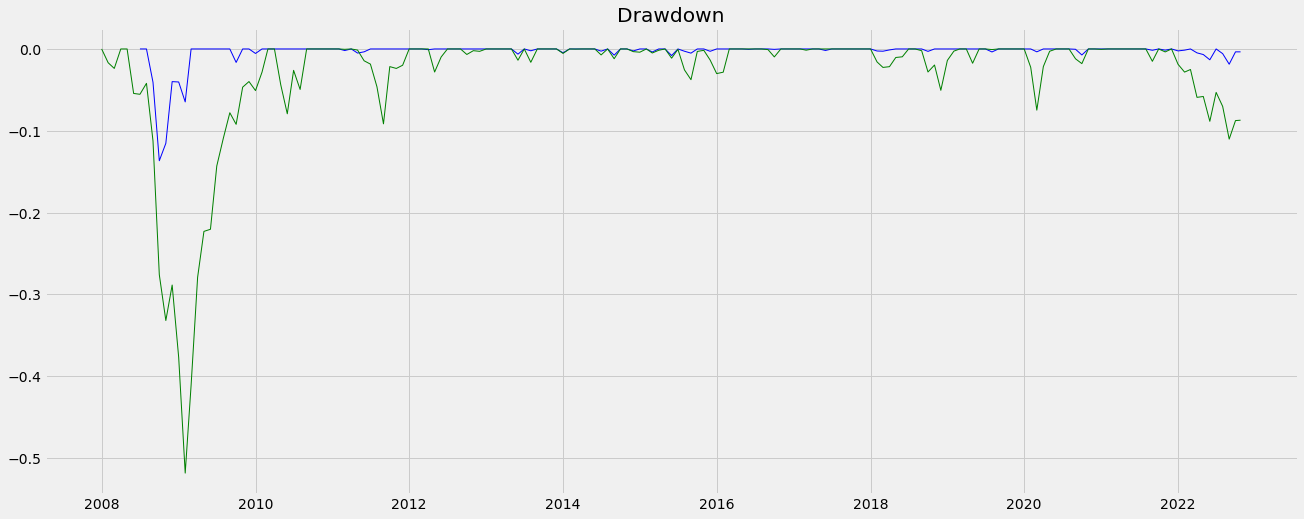

In [17]:
plt.figure(figsize=(20,8))
plt.plot(f.drawdown_DF(df)['date'], f.drawdown_DF(df)['drawdown'], linewidth=1, color='b')
plt.plot(f.drawdown_DF(benchmark)['date'], f.drawdown_DF(benchmark)['drawdown'], linewidth=1, color='g')
plt.title("Drawdown")
plt.show;

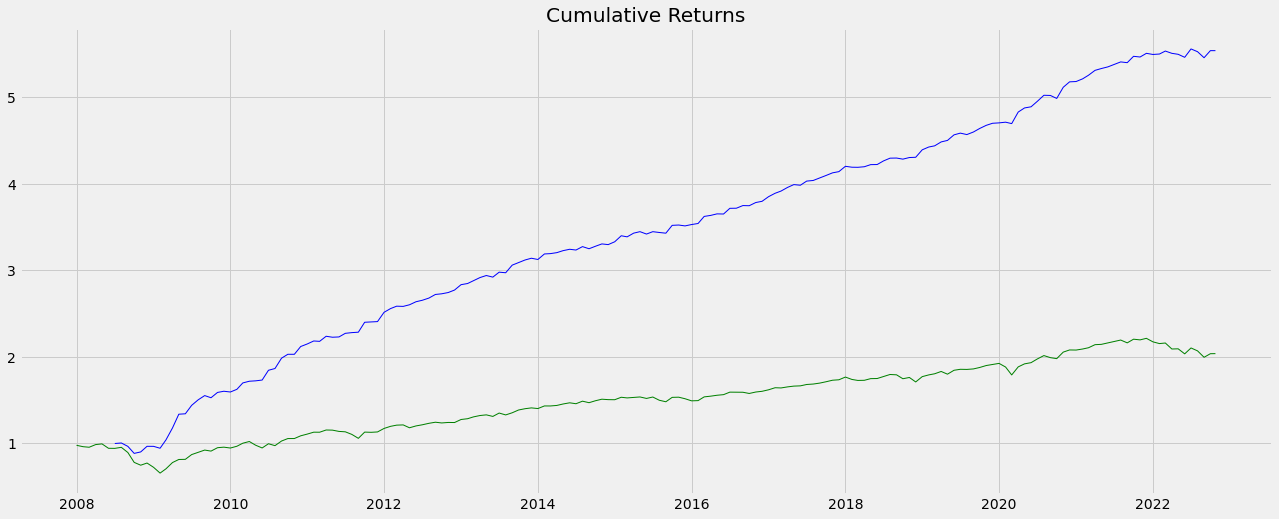

In [18]:
plt.figure(figsize=(20,8))
plt.plot(df['date'], df['Cumulative Returns'], linewidth=1, color='b')
plt.plot(benchmark['date'], benchmark['Cumulative Returns'], linewidth=1, color='g')
plt.title("Cumulative Returns")
plt.show;

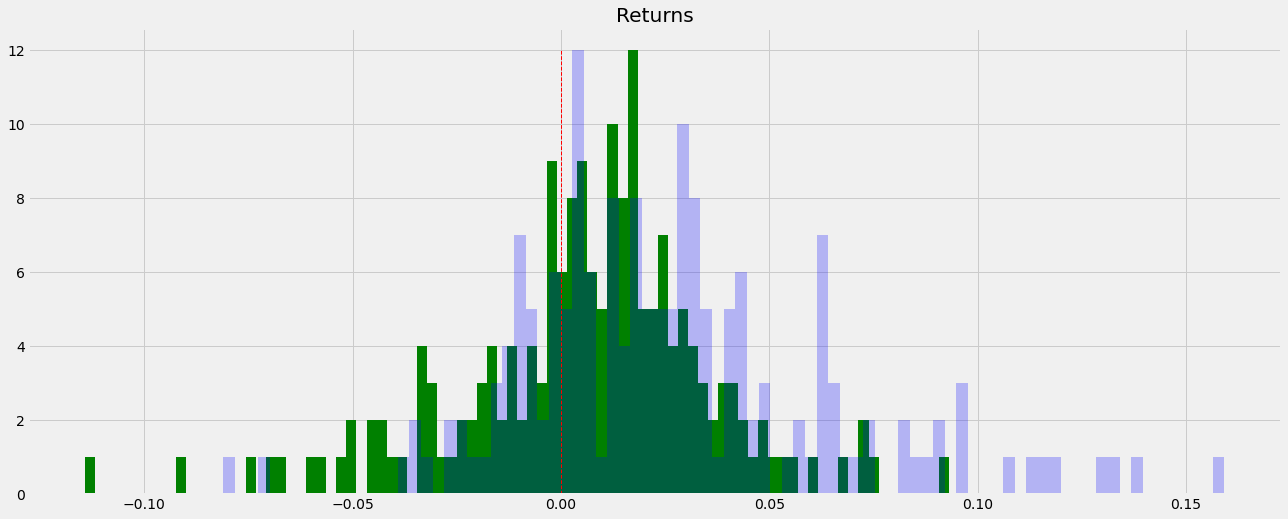

In [19]:
# plt.figure(figsize=(20,8))
# plt.vlines(0, 0, 12, color='r', linestyle='dashed', linewidth=1)
# plt.hist(benchmark['ret'], bins=int(len(df['ret'])/2), color='g')
# plt.hist(df['ret'], bins=int(len(df['ret'])/2), alpha = 0.25, color='b')
# plt.title("Returns")
# plt.show;

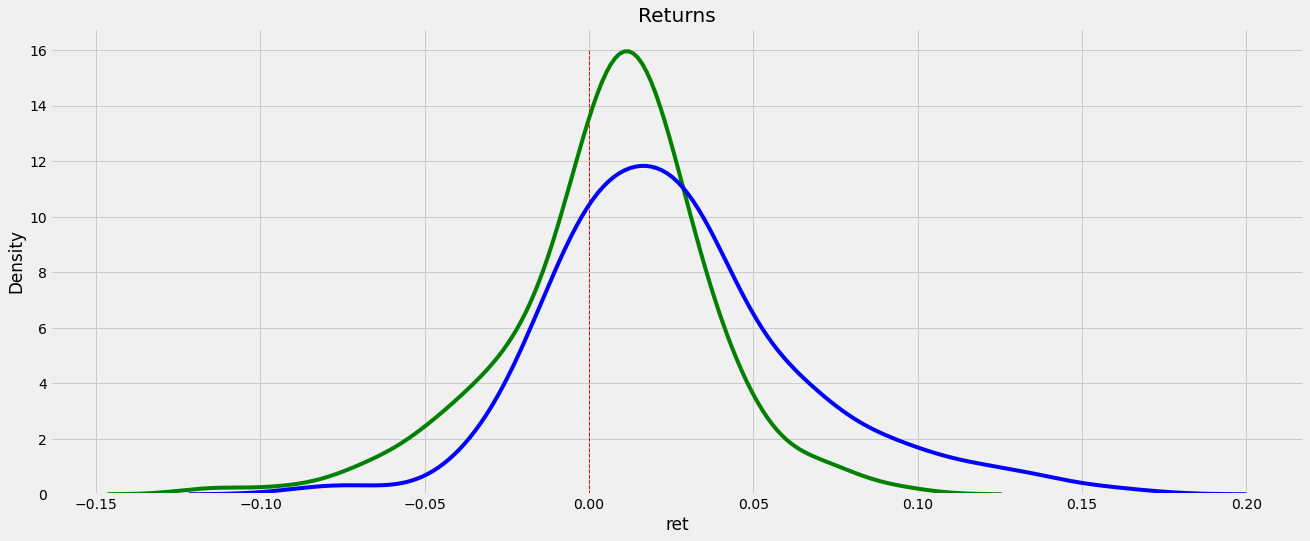

In [21]:
plt.figure(figsize=(20,8))
plt.vlines(0, 0, 16, color='r', linestyle='dashed', linewidth=1)
sns.distplot(benchmark['ret'], hist=False, bins=int(len(df['ret'])/2), color='g')
sns.distplot(df['ret'], hist=False, bins=int(len(df['ret'])/2), color='b')
plt.title("Returns")
plt.show;

#### Ideas  
- add Column with initial balance to returns (add an arg to acceleratingDualMomentum(), called initial_balance)
- add benchmark 

#### To-do  
- add benchmark (60/40)
- drawdown period  
- fix periods in stats function - (monhtly is working)
- create a library for stats (aes)

#### Done  
- max drawdown
- drawdown plot

[Annualized Return 1](https://12ft.io/proxy?q=https%3A%2F%2Fpython.plainenglish.io%2Fcalculating-annualized-expected-stock-returns-using-python-aaba430ca8a9)  
[get fred data](https://12ft.io/proxy?q=https%3A%2F%2Fmedium.com%2Fswlh%2Fpandas-datareader-federal-reserve-economic-data-fred-a360c5795013)  
[calculate sharpe ratio](https://12ft.io/proxy?q=https%3A%2F%2Ftowardsdatascience.com%2Fcalculating-sharpe-ratio-with-python-755dcb346805)  
[Sharpe Ratio - CFI](https://corporatefinanceinstitute.com/resources/knowledge/finance/sharpe-ratio-definition-formula/)  
[CAGR - Investopedia](https://www.investopedia.com/terms/a/annualized-total-return.asp#:~:text=An%20annualized%20total%20return%20is,the%20annual%20return%20was%20compounded.)  
[CAGR - Felipe Rego](https://feliperego.github.io/blog/2016/08/10/CAGR-Function-In-Python)  
[stats (sharpe/dd/etc) - enexqnt/RBAA](https://github.com/enexqnt/RBAA/blob/main/RBAA.ipynb)  
[backtest](https://backtest.curvo.eu/portfolio/new)
[]()